In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [16]:
cat = pd.read_csv('../data/item_categories_kor.csv')
sales = pd.read_csv('../data/raw/sales_train.csv')
item = pd.read_csv('../data/raw/items.csv')

In [17]:
cat.head()

,item_category_name,item_category_id
0,PC - 헤드셋 / 헤드폰,0
1,액세서리 - PS2.,1
2,액세서리 - PS3.,2
3,액세서리 - PS4.,3
4,액세서리 - PSP.,4


In [18]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [19]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# Preprocessing - item category

In [20]:
cat1, cat2 = [], []
for n in cat.item_category_name:
    
    _ = n.split('-')
    cat1.append(_[0].strip())
    try: 
        cat2.append(_[1].strip())
    except:
        cat2.append(np.nan)
        
cat1[-5:], cat2[-5:]

(['서비스', '서비스', '클린 미디어 (첨탑)', '클린 미디어 (조각)', '전원 요소'],
 [nan, '티켓', nan, nan, nan])

In [21]:
cat['category1'] = cat1
cat['category2'] = cat2

cat.tail()

,item_category_name,item_category_id,category1,category2
79,서비스,79,서비스,NaN
80,서비스 - 티켓,80,서비스,티켓
81,클린 미디어 (첨탑),81,클린 미디어 (첨탑),NaN
82,클린 미디어 (조각),82,클린 미디어 (조각),NaN
83,전원 요소,83,전원 요소,NaN


# EDA - 카테고리별 판매량 비교

## 1. 분류기준 : item_category_id

### 상위 20개 카테고리의 Bar plot

In [22]:
_ = pd.merge(left=cat, right=item, how='left')

sales_cat = pd.merge(left=sales, right=_,
                    how='left', on='item_id')
sales_cat.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_name,item_category_id,category1,category2,item_name
0,02.01.2013,0,59,22154,999.00,1.0,필름 - 블루 레이,37,필름,블루 레이,ЯВЛЕНИЕ 2012 (BD)
1,03.01.2013,0,25,2552,899.00,1.0,음악 - 비닐,58,음악,비닐,DEEP PURPLE The House Of Blue Light LP
2,05.01.2013,0,25,2552,899.00,-1.0,음악 - 비닐,58,음악,비닐,DEEP PURPLE The House Of Blue Light LP
3,06.01.2013,0,25,2554,1709.05,1.0,음악 - 비닐,58,음악,비닐,DEEP PURPLE Who Do You Think We Are LP
4,15.01.2013,0,25,2555,1099.00,1.0,음악 - CD 기업 생산,56,음악,CD 기업 생산,DEEP PURPLE 30 Very Best Of 2CD (Фирм.)


total : 84


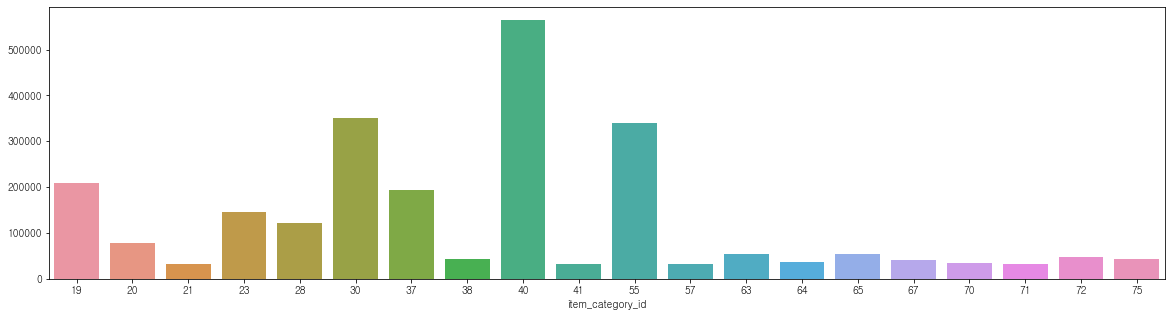

In [41]:
# 컬럼 선별
var_list = ['date', 'date_block_num', 'item_category_id', 'item_cnt_day']

# 총 기간
period_t = sales_cat[var_list].groupby('item_category_id').apply(len)
print('total :', period_t.shape[0])
_ = period_t.nlargest(20)
plt.figure(figsize=(20,5))
sns.barplot(x=_.index, y=_.values)
plt.show()

In [50]:
cat.loc[_.index]

,item_category_name,item_category_id
item_category_id,,
40,시네마 - DVD.,40
30,PC 게임 - Standard Editions.,30
55,음악 - 지역 생산 CD.,55
19,게임 - PS3.,19
37,필름 - 블루 레이,37
23,게임 - Xbox 360.,23
28,PC 게임 - 추가 버전,28
20,게임 - PS4.,20
63,선물 - 부드러운 장난감,63


### 하위 카테고리

total : 84


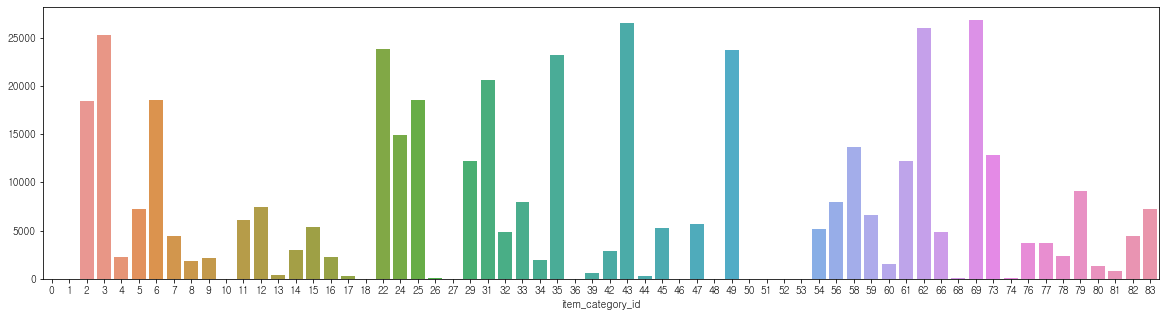

In [44]:
print('total :', period_t.shape[0])
_ = period_t.nsmallest(64)
plt.figure(figsize=(20,5))
sns.barplot(x=_.index, y=_.values)
plt.show()

### 파이차트

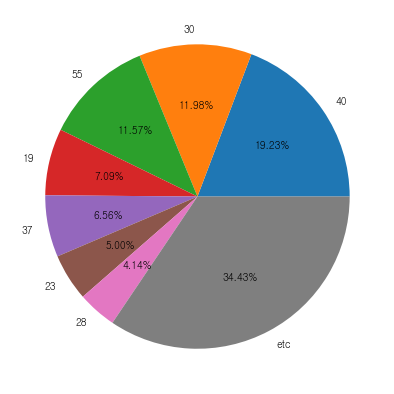

In [79]:
top7 = period_t.nlargest(7)
x = list(top7) + [period_t.sum() - top7.sum()]
y = list(top7.index) + ['etc']

plt.figure(figsize=(7,7))
plt.pie(x, labels=y, autopct='%.2f%%')
plt.show()

## 2. 분류기준: category1

### 상위 10개 항목

In [81]:
# category1 개수
print('length :', len(cat.category1.value_counts()))
cat.category1.value_counts()

length : 21


책                      13
선물                     12
게임 콘솔                   8
게임                      8
액세서리                    7
프로그램                    6
음악                      6
지불 카드                   4
PC 게임                   4
시네마                     4
서비스                     2
클린 미디어 (조각)             1
클린 미디어 (첨탑)             1
PC                      1
필름                      1
지불 카드 (시네마, 음악, 게임)     1
맥 게임                    1
안드로이드 게임                1
상품 배달                   1
티켓 (숫자)                 1
전원 요소                   1
Name: category1, dtype: int64

C:\Users\GW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category1'>

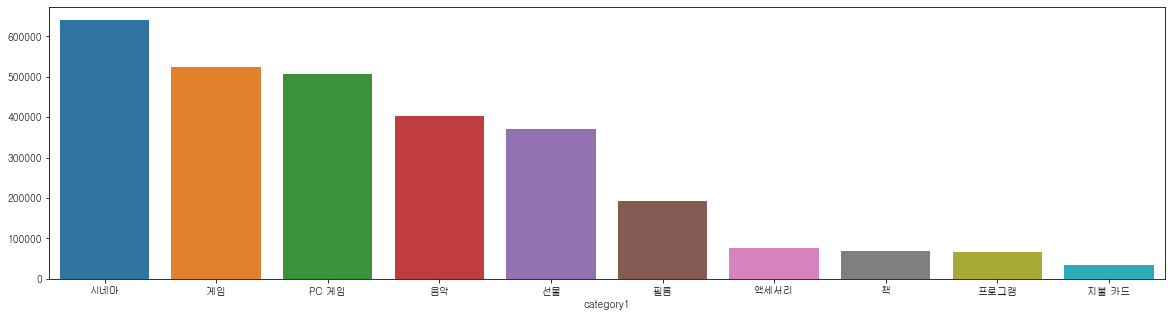

In [82]:
# 컬럼 선별
var_list = ['date', 'date_block_num', 'item_category_id', 'item_cnt_day', 'category1']

# 총 기간
period_t = sales_cat[var_list].groupby('category1').apply(len)
_ = period_t.nlargest(10)
plt.figure(figsize=(20,5))
sns.barplot(_.index, _.values)

### 파이차트 - 상위 4개 항목

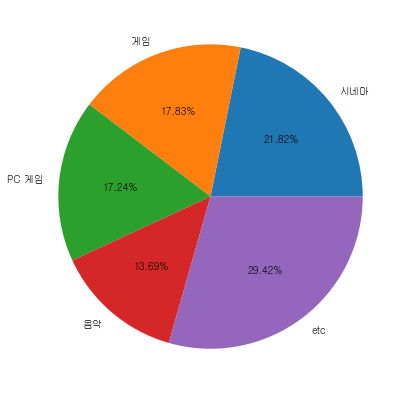

In [87]:
top7 = period_t.nlargest(4)
x = list(top7) + [period_t.sum() - top7.sum()]
y = list(top7.index) + ['etc']

plt.figure(figsize=(7,7))
plt.pie(x, labels=y, autopct='%.2f%%')
plt.show()

**탐색가능방향**
- 기간, 분기별 판매량
- 지역별 판매량
- 시계열

**적용기법**

0. Linear Regression Model
1. KNN Regression Model
2. ARIMA Model
3. XGboost(Decision Tree -> Ensamble Model)
4. LSTM 등 Neural Network Model

In [89]:
cat

,item_category_name,item_category_id,category1,category2
0,PC - 헤드셋 / 헤드폰,0,PC,헤드셋 / 헤드폰
1,액세서리 - PS2.,1,액세서리,PS2.
2,액세서리 - PS3.,2,액세서리,PS3.
3,액세서리 - PS4.,3,액세서리,PS4.
4,액세서리 - PSP.,4,액세서리,PSP.
...,...,...,...,...
79,서비스,79,서비스,NaN
80,서비스 - 티켓,80,서비스,티켓
81,클린 미디어 (첨탑),81,클린 미디어 (첨탑),NaN
82,클린 미디어 (조각),82,클린 미디어 (조각),NaN


In [92]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

cat1 = LE.fit_transform(cat.category1)
cat2 = LE.fit_transform(cat.category2)

cat['category1_id'] = cat1
cat['category2_id'] = cat2

cat

,item_category_name,item_category_id,category1,category2,category1_id,category2_id
0,PC - 헤드셋 / 헤드폰,0,PC,헤드셋 / 헤드폰,0,60
1,액세서리 - PS2.,1,액세서리,PS2.,10,6
2,액세서리 - PS3.,2,액세서리,PS3.,10,7
3,액세서리 - PS4.,3,액세서리,PS4.,10,8
4,액세서리 - PSP.,4,액세서리,PSP.,10,10
...,...,...,...,...,...,...
79,서비스,79,서비스,NaN,6,62
80,서비스 - 티켓,80,서비스,티켓,6,59
81,클린 미디어 (첨탑),81,클린 미디어 (첨탑),NaN,17,62
82,클린 미디어 (조각),82,클린 미디어 (조각),NaN,16,62


In [93]:
cat.to_csv('../data/item_splitcat_kor.csv', index=False)